In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

In [3]:
bina=ldata("tc01_data/yeast_Y2H.txt")
prot=ldata("tc01_data/yeast_AP-MS.txt")
lit=ldata("tc01_data/yeast_LIT.txt")

In [4]:
B=nx.Graph()
B.add_edges_from(bina)
P=nx.Graph()
P.add_edges_from(prot)
L=nx.Graph()
L.add_edges_from(lit)

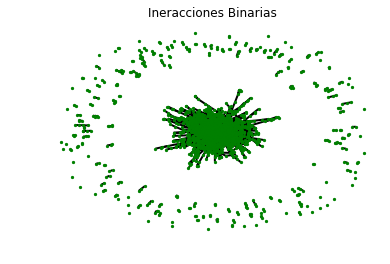

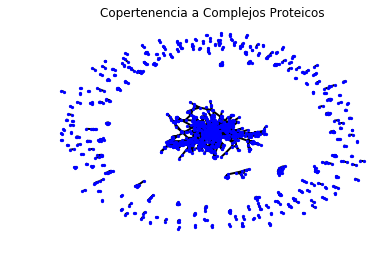

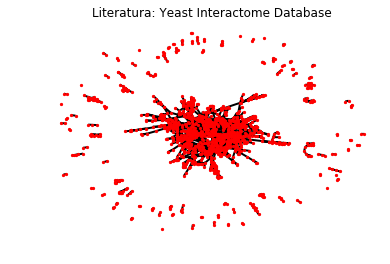

In [5]:
plt.figure(1)
plt.title("Ineracciones Binarias")
nx.draw(B, with_labels=False,node_color="green", node_size=5, width=2)

plt.figure(2)
plt.title("Copertenencia a Complejos Proteicos")
nx.draw(P, with_labels=False, node_color="blue", node_size=5, width=2)

plt.figure(3)
plt.title("Literatura: Yeast Interactome Database")
nx.draw(L, with_labels=False,node_color="red", node_size=5, width=2)

#despues va a haber que tunear dimensiones para el display del trabajo final


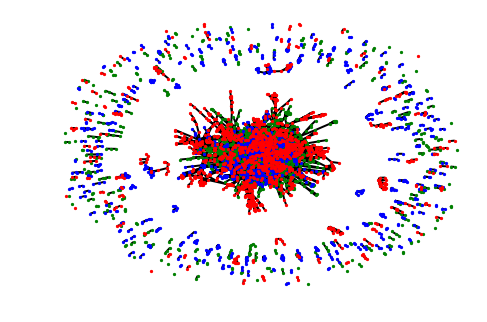

In [6]:
plt.figure(4)

B=nx.Graph()
B.add_edges_from(bina)
nx.draw(B, with_labels=False,node_color="green", node_size=5, width=2)

P=nx.Graph()
P.add_edges_from(prot)
nx.draw(P, with_labels=False, node_color="blue", node_size=5, width=2)

L=nx.Graph()
L.add_edges_from(lit)
nx.draw(L, with_labels=False,node_color="red", node_size=5, width=2)

In [7]:
G=[B,P,L]

In [8]:
N = np.empty_like(G) #i
L = np.empty_like(G) #ii
D = np.empty_like(G) #iv
G_mean = np.empty_like(G)
G_max = np.empty_like(G)
G_min  = np.empty_like(G)
dens = np.empty_like(G)
clu = np.empty_like(G)
clu_d = np.empty_like(G)
diam = np.empty_like(G)


def grados_BPL(r):
    L = len(G[r])
    degrees = np.zeros(L)#argumento = elemento de G (indice)
    for j in range(0,L): #G[r], un grafo particular de G
        degrees[j] = list(G[r].degree())[j][1] #este for #sirve para ir armando una lista de únicamente los grados por #nodo de cada grafo de G. El primer list convierte el degree
#view a una lista, conformada por pares (nombre de proteina,
#,cantidad de enlaces), el [j][1] barre toda la lista seleccionan
#do sólo la cantidad de links. Esa lista final es "degrees"
#conformada por la cantidad de nodos del grafo G[r].
    return degrees

def directed(A):
    for i in range(0,len(A)):
        for r in range(i+1,len(A)):
            if A[i][0] == A[r][1] and A[i][1] == A[r][0]:
                return "SI"
    return "NO"

In [9]:
for i in range(0,len(G)):
    N[i] = G[i].number_of_nodes()
    L[i] = G[i].number_of_edges()
    G_mean[i] = np.mean(grados_BPL(i)) #opero con la lista de #la función que cree
    G_max[i] = np.max(grados_BPL(i))
    G_min[i] = np.min(grados_BPL(i))
    dens[i] = nx.density(G[i])
    clu[i] = nx.average_clustering(G[i])
    clu_d[i] = nx.transitivity(G[i])
    diam[i] = nx.diameter(max(nx.connected_component_subgraphs(G[i]), key=len))

dirigido = [directed(bina), directed(prot), directed(lit)]



In [10]:
tabla = pd.DataFrame({"Red":["Binarias","Proteicas","Literatura"],"# de nodos":N,"# total de enlaces":L,"Grado medio":G_mean,"Grado máximo":G_max,"Grado mínimo":G_min,"Densidad de la red":dens,"Coef. de Clust. red": clu,"Clust. red Transitividad":clu_d,"Diámetro de la red":diam, "Dirigida?":dirigido})

print(tabla)

          Red # de nodos # total de enlaces Grado medio Grado máximo  \
0    Binarias       2018               2930     2.90387           91   
1   Proteicas       1622               9070     11.1837          127   
2  Literatura       1536               2925     3.80859           40   

  Grado mínimo Densidad de la red Coef. de Clust. red  \
0            1          0.0014397            0.046194   
1            1         0.00689927            0.554636   
2            1         0.00248117            0.292492   

  Clust. red Transitividad Diámetro de la red Dirigida?  
0                0.0236142                 14        NO  
1                  0.61859                 15        NO  
2                 0.346193                 19        NO  


In [37]:
delfg= nx.read_gml("tc01_data/dolphins.gml")
delft= ldata("tc01_data/dolphins.txt")
dgen= ldata("tc01_data/dolphinsGender.txt")

In [38]:
D=delfg

ng=pd.DataFrame(dgen, columns=['Name','Gender'])
ng=ng.set_index('Name')
ng.to_dict()
nx.set_node_attributes(delfg, ng.to_dict(), 'Gender')
ng


,Gender
Name,
Five,f
Cross,m
SMN5,m
MN83,m
Trigger,f
Patchback,m
Vau,f
Fork,m
TR120,f


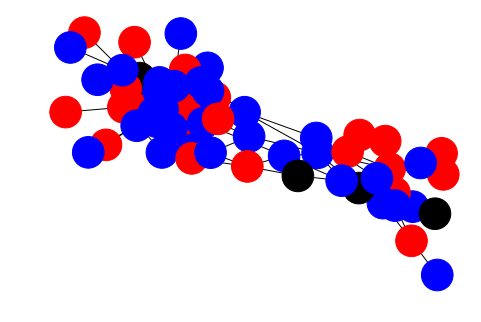

In [39]:
color_map=[]
for i in range(0,nx.number_of_nodes(delfg)):
        if [a[1] for a in dgen][i]=='f':
            color_map.append('r')
        elif [a[1] for a in dgen][i]=='m':
            color_map.append('b')
        else:
            color_map.append('k')

nx.draw(D, node_color= color_map,  node_size=1000) 


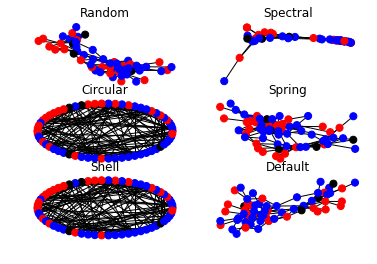

In [40]:
plt.figure(5)


plt.subplot(321)
plt.title('Random')
nx.draw(delfg,node_color=color_map, node_size=50)

plt.subplot(322)
plt.title('Spectral')
nx.draw_spectral(delfg, node_color=color_map, node_size=50)

plt.subplot(323)
plt.title('Circular')
nx.draw_circular(delfg,node_color=color_map, node_size=50)

plt.subplot(324)
plt.title('Spring')
nx.draw_spring(delfg,node_color=color_map, node_size=50)

plt.subplot(325)
plt.title('Shell')
nx.draw_shell(delfg,node_color=color_map, node_size=50)

plt.subplot(326)
plt.title('Default')
nx.draw(delfg,node_color=color_map, node_size=50)